In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

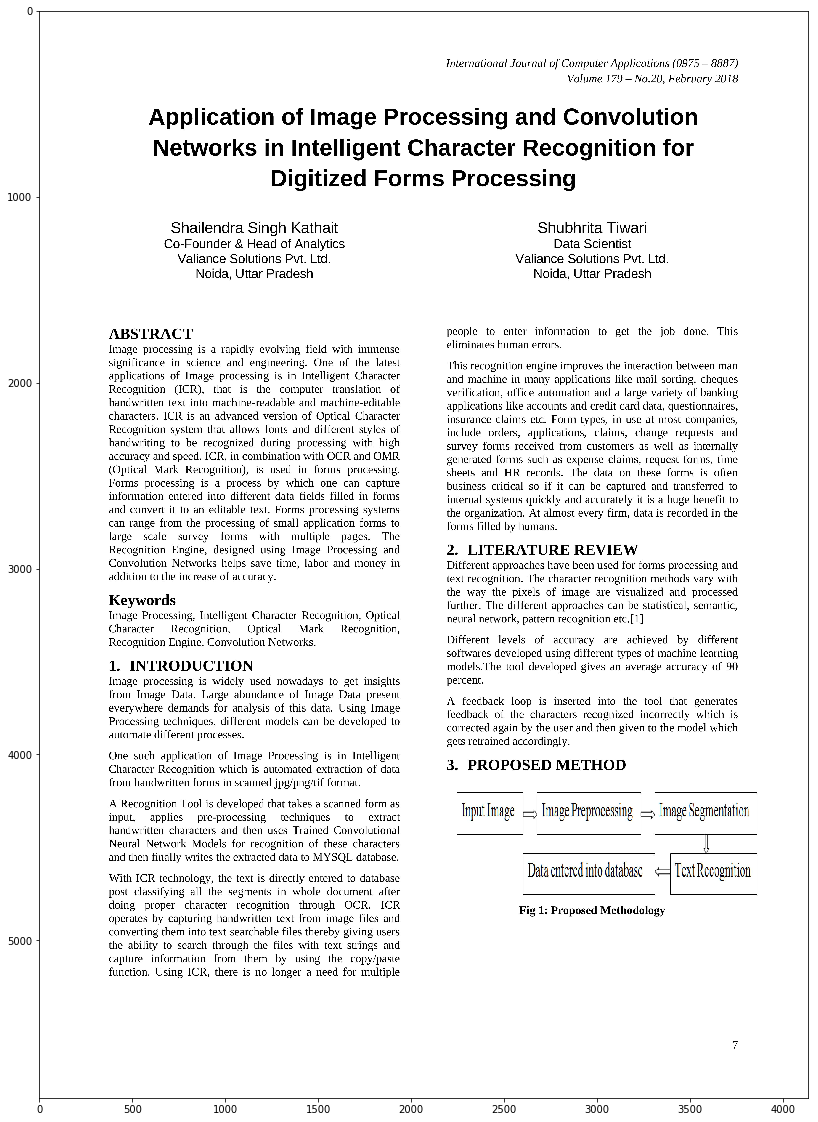

In [25]:
im = cv2.imread('frontpage.jpg')
plt.figure(figsize=(20,20))
plt.imshow(im)

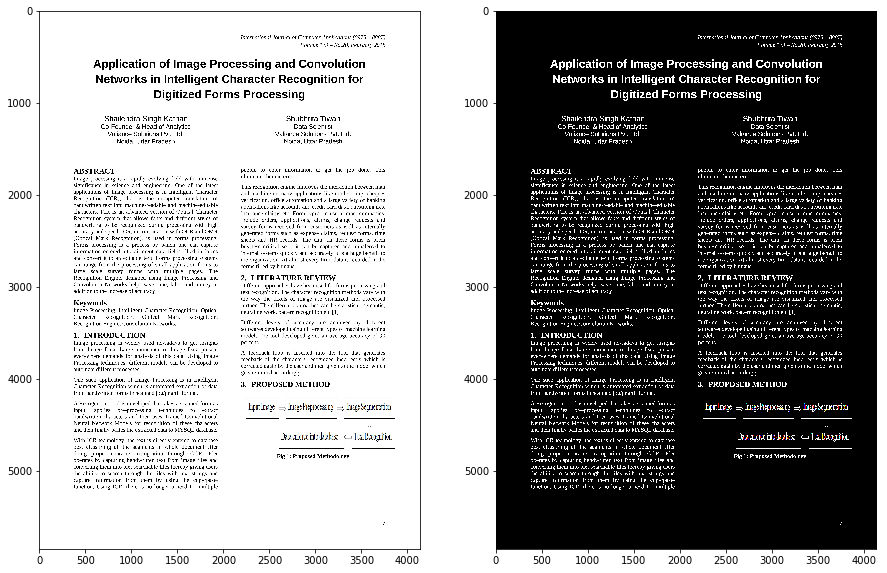

In [26]:
_, binary_thresh = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY_INV)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
fig.add_subplot(1, 2, 2)
plt.imshow(binary_thresh)

In [28]:
'''lines = cv2.HoughLinesP(binary_thresh, 1, numpy.pi/180, 100, minLineLength= 600/2.0, maxLineGap=20)'''
lines = cv2.HoughLinesP(binary_thresh, rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)       


error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/hough.cpp:471: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'


In [ ]:
'''angle = 0
for line in lines:
    x1, y1, x2, y2 = line[0]
    r = numpy.arctan2(y2 , y1, x2 , x1)
    angle += numpy.arctan2(y2 , y1, x2 , x1)
avg_radian = angle / len(lines)
avg_angle = avg_radian * 180 / numpy.pi
print("Average angle is %f degrees" % avg_angle)'''

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.morphologyEx(neg, cv2.MORPH_DILATE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
connected = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel, iterations=2)
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(neg)
fig.add_subplot(1, 3, 2)
plt.imshow(dilate)
fig.add_subplot(1, 3, 3)
plt.imshow(connected)

NameError: name 'neg' is not defined

In [ ]:
pic,contours,hierarchy=cv2.findContours(connected,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes=map(lambdac:cv2.boundingRect(c),contours)filtered=filter(lambdab:b[2]>20andb[3]>25,boxes)